<a href="https://colab.research.google.com/github/juliaNogueiraC/Projeto-de-Analise-de-Demissoes-e-Ativos/blob/main/C%C3%B3pia_de_calculo_de_turnover(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

#FUNCIONÁRIOS ATIVOS E INATIVOS

In [ ]:
import pandas as pd
from tabulate import tabulate

# Carregar as duas abas da planilha
df_ativos = pd.read_excel('/content/planilha.xlsx', sheet_name='Ativos', parse_dates=['Data Admis.'])
df_demitidos = pd.read_excel('/content/planilha.xlsx', sheet_name='Desligados', parse_dates=['Data Admis.', 'Dt. Demissao'])

# Converter as colunas de datas para o formato correto (dia/mês/ano)
df_ativos['Data Admis.'] = pd.to_datetime(df_ativos['Data Admis.'], dayfirst=True)
df_demitidos['Data Admis.'] = pd.to_datetime(df_demitidos['Data Admis.'], dayfirst=True)
df_demitidos['Dt. Demissao'] = pd.to_datetime(df_demitidos['Dt. Demissao'], dayfirst=True)

# Definir o período de análise
meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho']
meses_num = [1, 2, 3, 4, 5, 6]

# Filtrar demissões por mês em 2024
demitidos_2024 = df_demitidos[df_demitidos['Dt. Demissao'].dt.year == 2024]
demitidos_por_mes = demitidos_2024.groupby(demitidos_2024['Dt. Demissao'].dt.month).size().reindex(meses_num, fill_value=0).to_dict()

# Filtrar ativos por mês em 2024
ativos_por_mes = {}
for mes_num, mes in zip(meses_num, meses):
    # Funcionários ativos até o início do mês corrente
    ativos_antes_mes = df_ativos[df_ativos['Data Admis.'] <= pd.Timestamp(f'2024-{mes_num:02d}-01')]
    demitidos_antes_mes = df_demitidos[(df_demitidos['Data Admis.'] <= pd.Timestamp(f'2024-{mes_num:02d}-01')) &
                                       (df_demitidos['Dt. Demissao'] > pd.Timestamp(f'2024-{mes_num:02d}-01'))]
    ativos_por_mes[mes] = len(ativos_antes_mes) + len(demitidos_antes_mes) - demitidos_por_mes[mes_num]

# Preparar dados para exibição
demissoes_data = [[mes.capitalize(), demitidos_por_mes[mes_num]] for mes_num, mes in zip(meses_num, meses)]
ativos_data = [[mes.capitalize(), count] for mes, count in ativos_por_mes.items()]

# Exibir os resultados de forma elegante
print("Funcionários demitidos por mês em 2024:")
print(tabulate(demissoes_data, headers=['Mês', 'Quantidade de Demissões'], tablefmt='pretty'))

print("\nFuncionários ativos por mês em 2024:")
print(tabulate(ativos_data, headers=['Mês', 'Quantidade de Ativos'], tablefmt='pretty'))


Funcionários demitidos por mês em 2024:
+-----------+-------------------------+
|    Mês    | Quantidade de Demissões |
+-----------+-------------------------+
|  Janeiro  |           93            |
| Fevereiro |           65            |
|   Março   |           90            |
|   Abril   |           110           |
|   Maio    |           120           |
|   Junho   |           139           |
+-----------+-------------------------+

Funcionários ativos por mês em 2024:
+-----------+----------------------+
|    Mês    | Quantidade de Ativos |
+-----------+----------------------+
|  Janeiro  |         993          |
| Fevereiro |         1094         |
|   Março   |         1164         |
|   Abril   |         1270         |
|   Maio    |         1361         |
|   Junho   |         1321         |
+-----------+----------------------+


#JANEIRO

In [ ]:
import pandas as pd
from tabulate import tabulate

# Definir o caminho para a planilha de janeiro (ajuste conforme necessário)
caminho_planilha_janeiro = '/content/DESLIGAMENTOS 01.24.xlsx'
aba_janeiro = 'DESLIGUES JANEIRO 24'  # Nome da aba específica que contém os dados

try:
    # Carregar a planilha de demissões de janeiro e a aba específica
    planilha_janeiro = pd.read_excel(caminho_planilha_janeiro, sheet_name=aba_janeiro)

    # Verificar se a coluna 'TIPO DE DESLIGAMENTO' existe na planilha
    if 'TIPO DE DESLIGAMENTO' not in planilha_janeiro.columns:
        raise KeyError("'TIPO DE DESLIGAMENTO' não encontrado na aba de janeiro")

    # Tipos de desligamento
    desligamentos_involuntarios = [
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 2ª EXP.',
        'DISPENSA SEM JUSTA CAUSA',
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 1ª EXP.',
        'TERMINO DE CONTRATO ANTECIPADO - EMPREGADOR',
        'DISPENSA POR JUSTA CAUSA'
    ]

    desligamentos_voluntarios = [
        'PEDIDO DE DESLIGAMENTO - SEM CUMPRIMENTO DE AVISO',
        'TERMINO DE CONTRATO ANTECIPADO - A PEDIDO DO EMPREGADO',
        'PEDIDO DE DESLIGAMENTO - COM CUMPRIMENTO DE AVISO'
    ]

    # Contar desligamentos involuntários e voluntários
    contagem_involuntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_involuntarios)].shape[0]
    contagem_voluntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_voluntarios)].shape[0]

    # Preparar dados para exibição
    desligamentos_data = [
        ['Involuntárias', contagem_involuntarios],
        ['Voluntárias', contagem_voluntarios]
    ]

    # Exibir os resultados de forma elegante
    print(f"Demissões em janeiro na aba '{aba_janeiro}':")
    print(tabulate(desligamentos_data, headers=['Tipo de Desligamento', 'Quantidade'], tablefmt='pretty'))

except FileNotFoundError:
    print(f"Arquivo não encontrado: {caminho_planilha_janeiro}")
except KeyError as e:
    print(f"Erro: {e}")


Demissões em janeiro na aba 'DESLIGUES JANEIRO 24':
+----------------------+------------+
| Tipo de Desligamento | Quantidade |
+----------------------+------------+
|    Involuntárias     |     42     |
|     Voluntárias      |     51     |
+----------------------+------------+


#FEVEREIRO

In [ ]:
import pandas as pd
from tabulate import tabulate

# Definir o caminho para a planilha de janeiro (ajuste conforme necessário)
caminho_planilha_janeiro = '/content/DESLIGAMENTOS 02.24.xlsx'
aba_janeiro = 'DESLIGUES FEVEREIRO 24'  # Nome da aba específica que contém os dados

try:
    # Carregar a planilha de demissões de janeiro e a aba específica
    planilha_janeiro = pd.read_excel(caminho_planilha_janeiro, sheet_name=aba_janeiro)

    # Verificar se a coluna 'TIPO DE DESLIGAMENTO' existe na planilha
    if 'TIPO DE DESLIGAMENTO' not in planilha_janeiro.columns:
        raise KeyError("'TIPO DE DESLIGAMENTO' não encontrado na aba de janeiro")

    # Tipos de desligamento
    desligamentos_involuntarios = [
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 2ª EXP.',
        'DISPENSA SEM JUSTA CAUSA',
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 1ª EXP.',
        'TERMINO DE CONTRATO ANTECIPADO - EMPREGADOR',
        'DISPENSA POR JUSTA CAUSA'
    ]

    desligamentos_voluntarios = [
        'PEDIDO DE DESLIGAMENTO - SEM CUMPRIMENTO DE AVISO',
        'TERMINO DE CONTRATO ANTECIPADO - A PEDIDO DO EMPREGADO',
        'PEDIDO DE DESLIGAMENTO - COM CUMPRIMENTO DE AVISO'
    ]

    # Contar desligamentos involuntários e voluntários
    contagem_involuntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_involuntarios)].shape[0]
    contagem_voluntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_voluntarios)].shape[0]

    # Preparar dados para exibição
    desligamentos_data = [
        ['Involuntárias', contagem_involuntarios],
        ['Voluntárias', contagem_voluntarios]
    ]

    # Exibir os resultados de forma elegante
    print(f"Demissões em Fevereiro na aba '{aba_janeiro}':")
    print(tabulate(desligamentos_data, headers=['Tipo de Desligamento', 'Quantidade'], tablefmt='pretty'))

except FileNotFoundError:
    print(f"Arquivo não encontrado: {caminho_planilha_janeiro}")
except KeyError as e:
    print(f"Erro: {e}")


Demissões em Fevereiro na aba 'DESLIGUES FEVEREIRO 24':
+----------------------+------------+
| Tipo de Desligamento | Quantidade |
+----------------------+------------+
|    Involuntárias     |     28     |
|     Voluntárias      |     37     |
+----------------------+------------+


#MARÇO

In [ ]:
import pandas as pd
from tabulate import tabulate

# Definir o caminho para a planilha de janeiro (ajuste conforme necessário)
caminho_planilha_janeiro = '/content/DESLIGAMENTOS 03.24.xlsx'
aba_janeiro = 'DESLIGUES MARÇO'  # Nome da aba específica que contém os dados

try:
    # Carregar a planilha de demissões de janeiro e a aba específica
    planilha_janeiro = pd.read_excel(caminho_planilha_janeiro, sheet_name=aba_janeiro)

    # Verificar se a coluna 'TIPO DE DESLIGAMENTO' existe na planilha
    if 'TIPO DE DESLIGAMENTO' not in planilha_janeiro.columns:
        raise KeyError("'TIPO DE DESLIGAMENTO' não encontrado na aba de janeiro")

    # Tipos de desligamento
    desligamentos_involuntarios = [
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 2ª EXP.',
        'DISPENSA SEM JUSTA CAUSA',
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 1ª EXP.',
        'TERMINO DE CONTRATO ANTECIPADO - EMPREGADOR',
        'DISPENSA POR JUSTA CAUSA'
    ]

    desligamentos_voluntarios = [
        'PEDIDO DE DESLIGAMENTO - SEM CUMPRIMENTO DE AVISO',
        'TERMINO DE CONTRATO ANTECIPADO - A PEDIDO DO EMPREGADO',
        'PEDIDO DE DESLIGAMENTO - COM CUMPRIMENTO DE AVISO'
    ]

    # Contar desligamentos involuntários e voluntários
    contagem_involuntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_involuntarios)].shape[0]
    contagem_voluntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_voluntarios)].shape[0]

    # Preparar dados para exibição
    desligamentos_data = [
        ['Involuntárias', contagem_involuntarios],
        ['Voluntárias', contagem_voluntarios]
    ]

    # Exibir os resultados de forma elegante
    print(f"Demissões em março na aba '{aba_janeiro}':")
    print(tabulate(desligamentos_data, headers=['Tipo de Desligamento', 'Quantidade'], tablefmt='pretty'))

except FileNotFoundError:
    print(f"Arquivo não encontrado: {caminho_planilha_janeiro}")
except KeyError as e:
    print(f"Erro: {e}")


Demissões em março na aba 'DESLIGUES MARÇO':
+----------------------+------------+
| Tipo de Desligamento | Quantidade |
+----------------------+------------+
|    Involuntárias     |     46     |
|     Voluntárias      |     44     |
+----------------------+------------+


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


#ABRIL


In [ ]:
import pandas as pd
from tabulate import tabulate

# Definir o caminho para a planilha de janeiro (ajuste conforme necessário)
caminho_planilha_janeiro = '/content/DESLIGAMENTOS 04.24 (1).xlsx'
aba_janeiro = 'DESLIGUES ABRIL'  # Nome da aba específica que contém os dados

try:
    # Carregar a planilha de demissões de janeiro e a aba específica
    planilha_janeiro = pd.read_excel(caminho_planilha_janeiro, sheet_name=aba_janeiro)

    # Verificar se a coluna 'TIPO DE DESLIGAMENTO' existe na planilha
    if 'TIPO DE DESLIGAMENTO' not in planilha_janeiro.columns:
        raise KeyError("'TIPO DE DESLIGAMENTO' não encontrado na aba de janeiro")

    # Tipos de desligamento
    desligamentos_involuntarios = [
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 2ª EXP.',
        'DISPENSA SEM JUSTA CAUSA',
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 1ª EXP.',
        'TERMINO DE CONTRATO ANTECIPADO - EMPREGADOR',
        'DISPENSA POR JUSTA CAUSA'
    ]

    desligamentos_voluntarios = [
        'PEDIDO DE DESLIGAMENTO - SEM CUMPRIMENTO DE AVISO',
        'TERMINO DE CONTRATO ANTECIPADO - A PEDIDO DO EMPREGADO',
        'PEDIDO DE DESLIGAMENTO - COM CUMPRIMENTO DE AVISO'
    ]

    # Contar desligamentos involuntários e voluntários
    contagem_involuntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_involuntarios)].shape[0]
    contagem_voluntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_voluntarios)].shape[0]

    # Preparar dados para exibição
    desligamentos_data = [
        ['Involuntárias', contagem_involuntarios],
        ['Voluntárias', contagem_voluntarios]
    ]

    # Exibir os resultados de forma elegante
    print(f"Demissões em ABRIL na aba '{aba_janeiro}':")
    print(tabulate(desligamentos_data, headers=['Tipo de Desligamento', 'Quantidade'], tablefmt='pretty'))

except FileNotFoundError:
    print(f"Arquivo não encontrado: {caminho_planilha_janeiro}")
except KeyError as e:
    print(f"Erro: {e}")


Demissões em ABRIL na aba 'DESLIGUES ABRIL':
+----------------------+------------+
| Tipo de Desligamento | Quantidade |
+----------------------+------------+
|    Involuntárias     |     4      |
|     Voluntárias      |    106     |
+----------------------+------------+


#MAIO


In [ ]:
import pandas as pd
from tabulate import tabulate

# Definir o caminho para a planilha de janeiro (ajuste conforme necessário)
caminho_planilha_janeiro = '/content/DESLIGAMENTOS 05.24.xlsx'
aba_janeiro = 'DESLIGUES MAIO'  # Nome da aba específica que contém os dados

try:
    # Carregar a planilha de demissões de janeiro e a aba específica
    planilha_janeiro = pd.read_excel(caminho_planilha_janeiro, sheet_name=aba_janeiro)

    # Verificar se a coluna 'TIPO DE DESLIGAMENTO' existe na planilha
    if 'TIPO DE DESLIGAMENTO' not in planilha_janeiro.columns:
        raise KeyError("'TIPO DE DESLIGAMENTO' não encontrado na aba de janeiro")

    # Tipos de desligamento
    desligamentos_involuntarios = [
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 2ª EXP.',
        'DISPENSA SEM JUSTA CAUSA',
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 1ª EXP.',
        'TERMINO DE CONTRATO ANTECIPADO - EMPREGADOR',
        'DISPENSA POR JUSTA CAUSA'
    ]

    desligamentos_voluntarios = [
        'PEDIDO DE DESLIGAMENTO - SEM CUMPRIMENTO DE AVISO',
        'TERMINO DE CONTRATO ANTECIPADO - A PEDIDO DO EMPREGADO',
        'PEDIDO DE DESLIGAMENTO - COM CUMPRIMENTO DE AVISO'
    ]

    # Contar desligamentos involuntários e voluntários
    contagem_involuntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_involuntarios)].shape[0]
    contagem_voluntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_voluntarios)].shape[0]

    # Preparar dados para exibição
    desligamentos_data = [
        ['Involuntárias', contagem_involuntarios],
        ['Voluntárias', contagem_voluntarios]
    ]

    # Exibir os resultados de forma elegante
    print(f"Demissões em MAIO na aba '{aba_janeiro}':")
    print(tabulate(desligamentos_data, headers=['Tipo de Desligamento', 'Quantidade'], tablefmt='pretty'))

except FileNotFoundError:
    print(f"Arquivo não encontrado: {caminho_planilha_janeiro}")
except KeyError as e:
    print(f"Erro: {e}")


Demissões em MAIO na aba 'DESLIGUES MAIO':
+----------------------+------------+
| Tipo de Desligamento | Quantidade |
+----------------------+------------+
|    Involuntárias     |     67     |
|     Voluntárias      |     43     |
+----------------------+------------+


#JUNHO

In [ ]:
import pandas as pd
from tabulate import tabulate

# Definir o caminho para a planilha de janeiro (ajuste conforme necessário)
caminho_planilha_janeiro = '/content/DESLIGAMENTOS 06.24.xlsx'
aba_janeiro = 'DESLIGUES JUNHO'  # Nome da aba específica que contém os dados

try:
    # Carregar a planilha de demissões de janeiro e a aba específica
    planilha_janeiro = pd.read_excel(caminho_planilha_janeiro, sheet_name=aba_janeiro)

    # Verificar se a coluna 'TIPO DE DESLIGAMENTO' existe na planilha
    if 'TIPO DE DESLIGAMENTO' not in planilha_janeiro.columns:
        raise KeyError("'TIPO DE DESLIGAMENTO' não encontrado na aba de janeiro")

    # Tipos de desligamento
    desligamentos_involuntarios = [
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 2ª EXP.',
        'DISPENSA SEM JUSTA CAUSA',
        'TERMINO DE CONTRATO POR PRAZO DETERMINADO - 1ª EXP.',
        'TERMINO DE CONTRATO ANTECIPADO - EMPREGADOR',
        'DISPENSA POR JUSTA CAUSA'
    ]

    desligamentos_voluntarios = [
        'PEDIDO DE DESLIGAMENTO - SEM CUMPRIMENTO DE AVISO',
        'TERMINO DE CONTRATO ANTECIPADO - A PEDIDO DO EMPREGADO',
        'PEDIDO DE DESLIGAMENTO - COM CUMPRIMENTO DE AVISO'
    ]

    # Contar desligamentos involuntários e voluntários
    contagem_involuntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_involuntarios)].shape[0]
    contagem_voluntarios = planilha_janeiro[planilha_janeiro['TIPO DE DESLIGAMENTO'].isin(desligamentos_voluntarios)].shape[0]

    # Preparar dados para exibição
    desligamentos_data = [
        ['Involuntárias', contagem_involuntarios],
        ['Voluntárias', contagem_voluntarios]
    ]

    # Exibir os resultados de forma elegante
    print(f"Demissões em JUNHO na aba '{aba_janeiro}':")
    print(tabulate(desligamentos_data, headers=['Tipo de Desligamento', 'Quantidade'], tablefmt='pretty'))

except FileNotFoundError:
    print(f"Arquivo não encontrado: {caminho_planilha_janeiro}")
except KeyError as e:
    print(f"Erro: {e}")


Demissões em JUNHO na aba 'DESLIGUES JUNHO':
+----------------------+------------+
| Tipo de Desligamento | Quantidade |
+----------------------+------------+
|    Involuntárias     |     65     |
|     Voluntárias      |     42     |
+----------------------+------------+


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


#Genero

In [ ]:
import pandas as pd

# Carregar a planilha
arquivo_excel = '/content/Cópia de lista de colaboradores ativos - julia (003).xlsx'
planilha = pd.read_excel(arquivo_excel, sheet_name='DESLIGADOS')

# Converter a coluna 'Dt. Demissao' para o tipo datetime
planilha['Dt. Demissao'] = pd.to_datetime(planilha['Dt. Demissao'], errors='coerce')

# Filtrar os dados para considerar apenas as demissões ocorridas em 2024
demissoes_2024 = planilha[planilha['Dt. Demissao'].dt.year == 2024]

# Analisar a coluna 'Sexo' e contar as demissões por gênero em 2024
contagem_demissoes_2024 = demissoes_2024['Sexo'].value_counts()

# Extrair contagem de homens e mulheres demitidos em 2024
mulheres_demitidas_2024 = contagem_demissoes_2024.get('Feminino', 0)
homens_demitidos_2024 = contagem_demissoes_2024.get('Masculino', 0)

# Exibir os resultados
print(f'Mulheres demitidas em 2024: {mulheres_demitidas_2024}')
print(f'Homens demitidos em 2024: {homens_demitidos_2024}')


Mulheres demitidas em 2024: 378
Homens demitidos em 2024: 239


# DEMISSÕES POR CENTRO DE CUSTO E POR CARGO

In [ ]:
!pip install tabulate


In [3]:
import pandas as pd
from tabulate import tabulate

# Carregar a planilha
arquivo_excel = '/content/Cópia de lista de colaboradores ativos - julia (003).xlsx'
planilha = pd.read_excel(arquivo_excel, sheet_name='DESLIGADOS')

# Converter a coluna 'Dt. Demissao' para o tipo datetime
planilha['Dt. Demissao'] = pd.to_datetime(planilha['Dt. Demissao'], errors='coerce')

# Filtrar os dados para considerar apenas as demissões ocorridas em 2024
demissoes_2024 = planilha[planilha['Dt. Demissao'].dt.year == 2024]

# Contar as demissões por Centro de Custo em 2024
contagem_por_centro_custo = demissoes_2024['Centro Custo'].value_counts().reset_index()
contagem_por_centro_custo.columns = ['Centro de Custo', 'Quantidade de Demissões']

# Contar as demissões por Função/Cargo em 2024
contagem_por_funcao = demissoes_2024['Desc.Funcao'].value_counts().reset_index()
contagem_por_funcao.columns = ['Função/Cargo', 'Quantidade de Demissões']

# Exibir os resultados de forma elegante
# print("Demissões em 2024 por Centro de Custo:")
# print(tabulate(contagem_por_centro_custo, headers='keys', tablefmt='pretty', showindex=False))

print("\nDemissões em 2024 por Função/Cargo:")
print(tabulate(contagem_por_funcao, headers='keys', tablefmt='pretty', showindex=False))



Demissões em 2024 por Função/Cargo:
+----------------------+-------------------------+
|     Função/Cargo     | Quantidade de Demissões |
+----------------------+-------------------------+
| OP DE TELEMARKETING  |           517           |
|  SUPERV. OPERACAO I  |           10            |
|   ASSISTENTE DE RH   |           10            |
|  AUDIT QUALIDADE II  |            9            |
|  AUX ADMINISTRATIVO  |            8            |
| JOV APRENDIZ ASS ADM |            8            |
| MONIT DE OPERACAO II |            6            |
| MONITOR DE OPERAÇÃO  |            4            |
| AUD DE QUALIDADE II  |            3            |
|     AUX. LIMPEZA     |            3            |
|  CONTROLE DE ACESSO  |            3            |
| ASSISTENTE DE RH II  |            3            |
|   ASSISTENTE DE TI   |            3            |
| ANALIS REC HUMAN III |            2            |
|  ANALISTA DE PROCES  |            2            |
|  ANALIST CON QUAL I  |            2        

#Gráficos

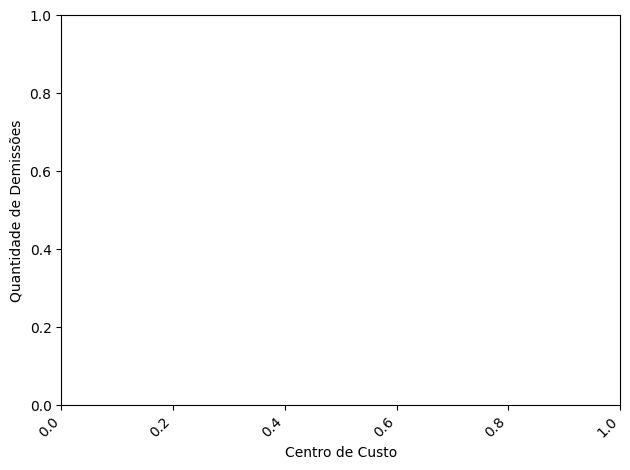

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Carregar a planilha
arquivo_excel = '/content/Cópia de lista de colaboradores ativos - julia (003).xlsx'
planilha = pd.read_excel(arquivo_excel, sheet_name='DESLIGADOS')

# Converter a coluna 'Dt. Demissao' para o tipo datetime
planilha['Dt. Demissao'] = pd.to_datetime(planilha['Dt. Demissao'], errors='coerce')

# Filtrar os dados para considerar apenas as demissões ocorridas em 2024
demissoes_2024 = planilha[planilha['Dt. Demissao'].dt.year == 2024]

# Contar as demissões por Centro de Custo em 2024
contagem_por_centro_custo = demissoes_2024['Centro Custo'].value_counts().reset_index()
contagem_por_centro_custo.columns = ['Centro de Custo', 'Quantidade de Demissões']

# Contar as demissões por Função/Cargo em 2024
contagem_por_funcao = demissoes_2024['Desc.Funcao'].value_counts().reset_index()
contagem_por_funcao.columns = ['Função/Cargo', 'Quantidade de Demissões']

# Analisar a coluna 'Sexo' e contar as demissões por gênero em 2024
contagem_demissoes_2024 = demissoes_2024['Sexo'].value_counts()

# Extrair contagem de homens e mulheres demitidos em 2024
mulheres_demitidas_2024 = contagem_demissoes_2024.get('Feminino', 0)
homens_demitidos_2024 = contagem_demissoes_2024.get('Masculino', 0)


# Gerar gráfico de demissões por Centro de Custo
# plt.figure(figsize=(14, 12))
#plt.bar(contagem_por_centro_custo['Centro de Custo'], contagem_por_centro_custo['Quantidade de Demissões'])
# plt.title('Demissões em 2024 por Centro de Custo')
plt.xlabel('Centro de Custo')
plt.ylabel('Quantidade de Demissões')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




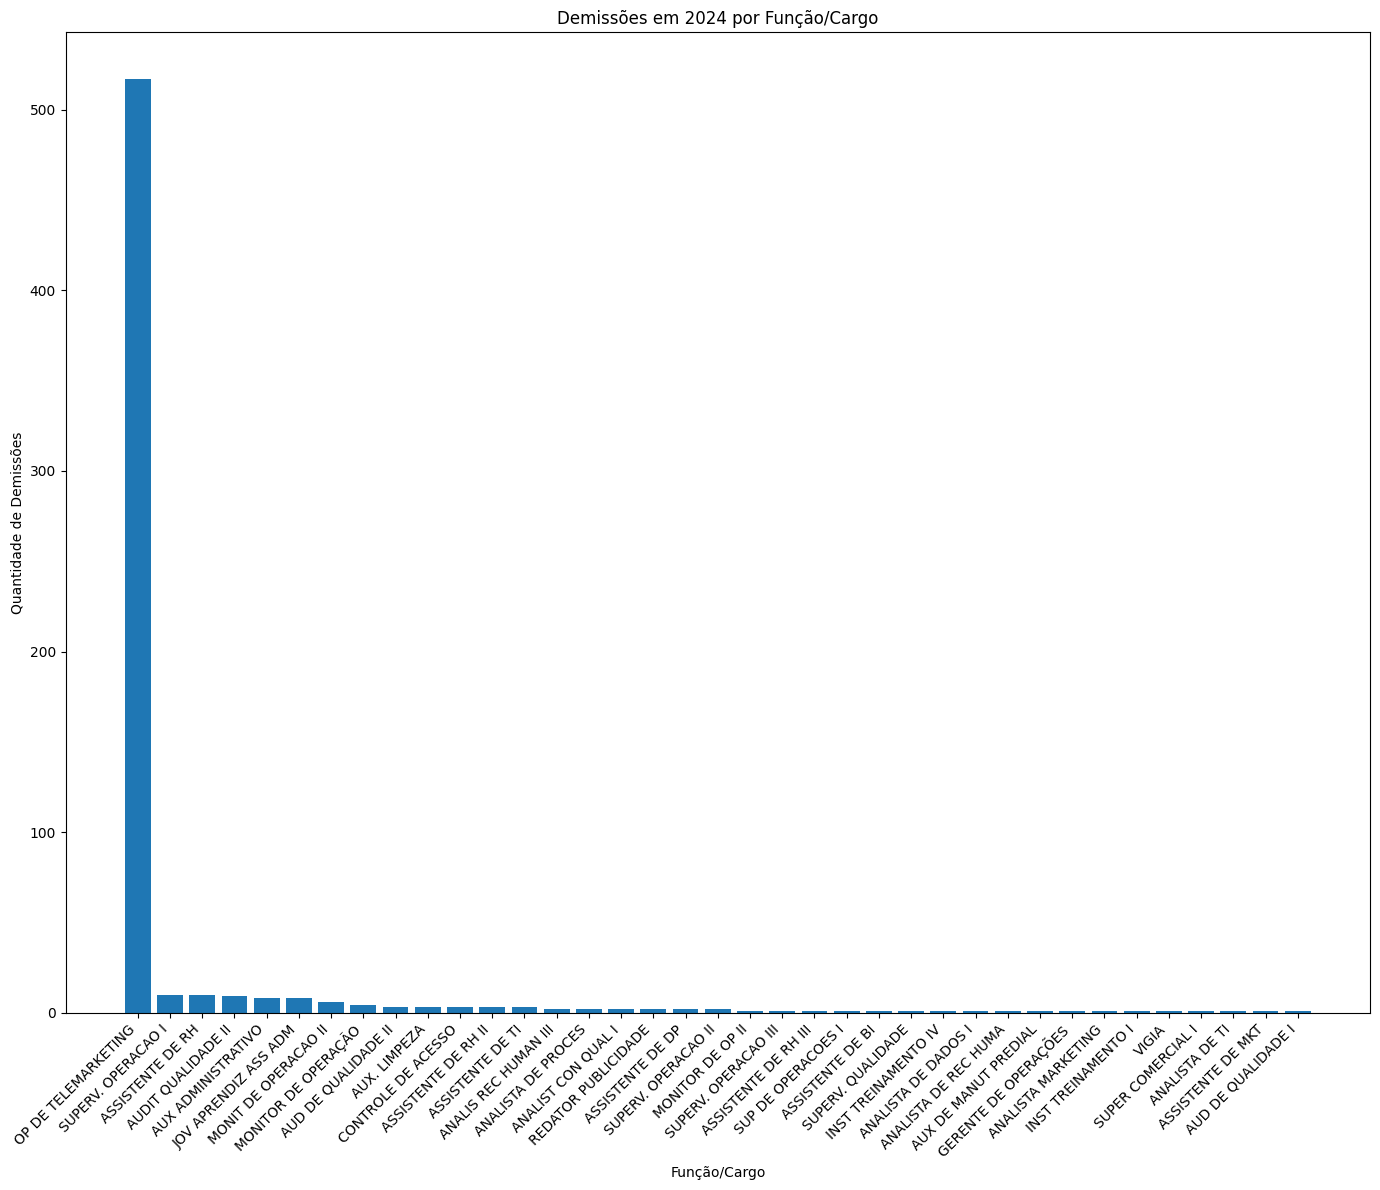

In [ ]:
# Gerar gráfico de demissões por Função/Cargo
plt.figure(figsize=(14, 12))
plt.bar(contagem_por_funcao['Função/Cargo'], contagem_por_funcao['Quantidade de Demissões'])
plt.title('Demissões em 2024 por Função/Cargo')
plt.xlabel('Função/Cargo')
plt.ylabel('Quantidade de Demissões')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



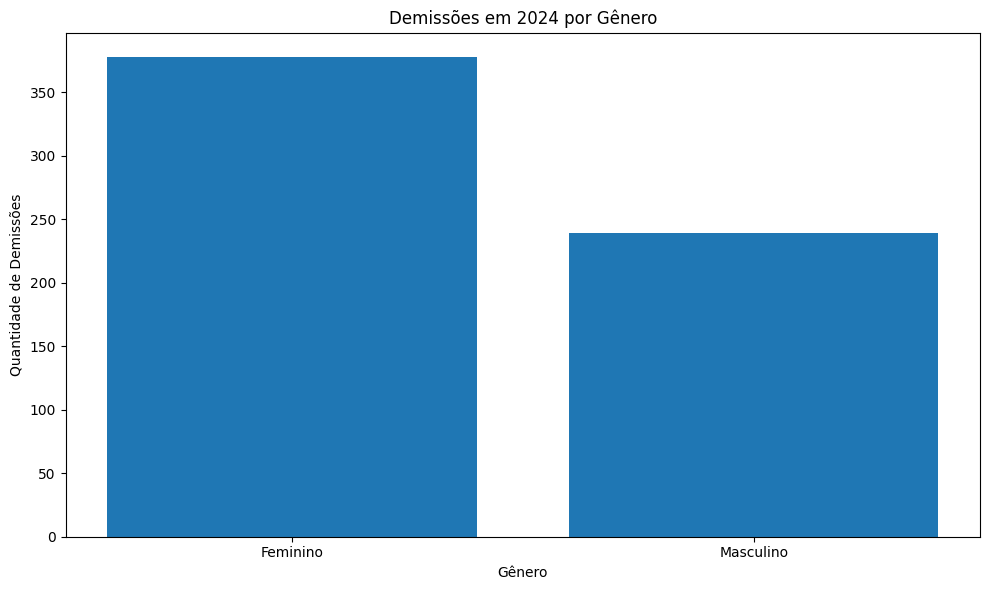

In [ ]:
# Gerar gráfico de demissões por gênero em 2024
genero_data = {'Gênero': ['Feminino', 'Masculino'], 'Quantidade de Demissões': [mulheres_demitidas_2024, homens_demitidos_2024]}
genero_df = pd.DataFrame(genero_data)
plt.figure(figsize=(10, 6))
plt.bar(genero_df['Gênero'], genero_df['Quantidade de Demissões'])
plt.title('Demissões em 2024 por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Demissões')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Dashboard do Cálculo
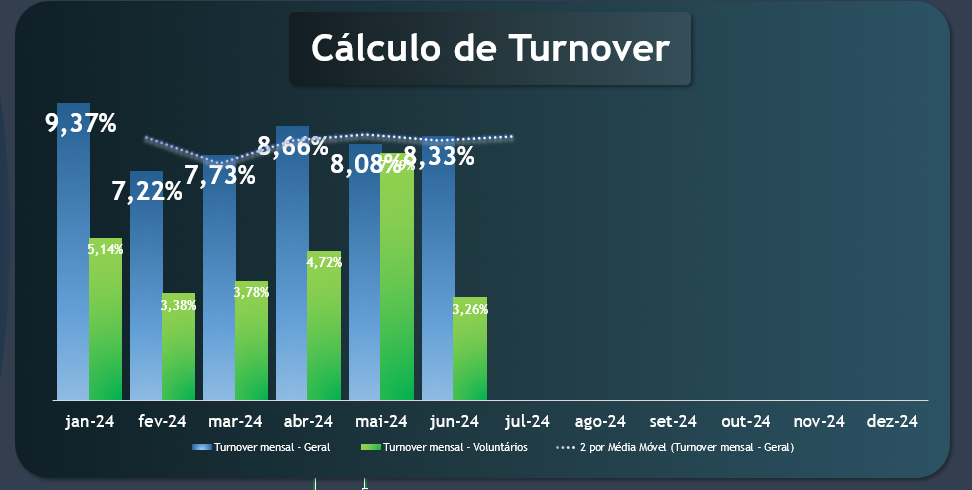